## Алгоритмы снижение размерности  
Далее на примерах я рассмотрю как работают выбранные алгоритмы снижение размерности, какие преимущества и недостатки есть у каждого и какие гиперпараметры на них нужно настраивать.  
Для начала скачаем данные, которые будем визуализировать  
### PCA (principal component analysis)  
Есть два пути использования PCA: для визуализации (сжатие до 2D/3D пространства) или для более простого обучения моделей машинного обучения (сохранение какого-то процента информации/дисперсии.  
Ресурс: https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

In [36]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import time


url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Теперь стандартизируем данные

In [37]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
target = df.loc[:,['target']]
df = df.loc[:, features]
df = pd.DataFrame(StandardScaler().fit_transform(df))
df.head()

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [38]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents,
                           columns = ['component_1', 'component_2'])
principalDf.head()

,component_1,component_2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


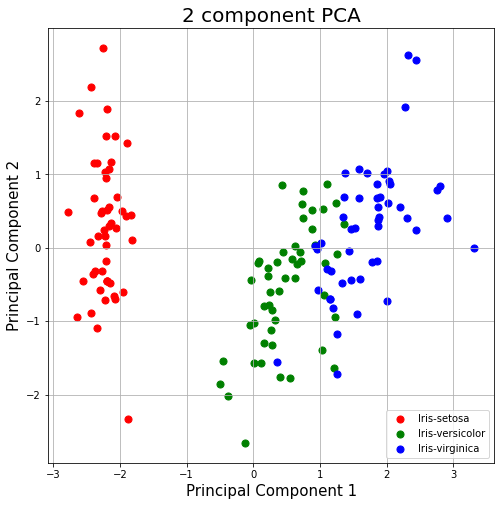

In [39]:
from matplotlib import pyplot as plt

finalDf = pd.concat([principalDf, target], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'component_1']
               , finalDf.loc[indicesToKeep, 'component_2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [40]:
print(f'First component: {round(pca.explained_variance_ratio_[0],5)}\nSecon component: {round(pca.explained_variance_ratio_[1],5)}\nSummary: {round(pca.explained_variance_ratio_.sum(),5)}')

First component: 0.7277
Secon component: 0.23031
Summary: 0.95801


Когда мы конвертируем информацию, можем потерять некоторые данные (variance/infomation).
Метод ниже объясняет как много информации изначально сохранилось в сжатом виде. Можем видеть, что 95% данных (дисперсии) сохранилось  
  
Тем самым мы сократили dimension наших признаков до 2D и можем визуализировать данные на графиках.   
Проделаем то же самое с t-SNE

In [45]:
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
target = df.loc[:,['target']]
df = df.loc[:, features]
df = pd.DataFrame(StandardScaler().fit_transform(df))

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
principalComponents = tsne.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents,
                           columns = ['component_1', 'component_2'])
principalDf.head()

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 150 samples in 0.000s...
[t-SNE] Computed neighbors for 150 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 150 / 150
[t-SNE] Mean sigma: 0.868185
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.838722
[t-SNE] KL divergence after 300 iterations: 0.132395


,component_1,component_2
0,-13.417263,0.739980
1,-13.377118,2.946409
2,-12.919969,2.263745
3,-12.939667,2.775513
4,-12.957049,0.542043


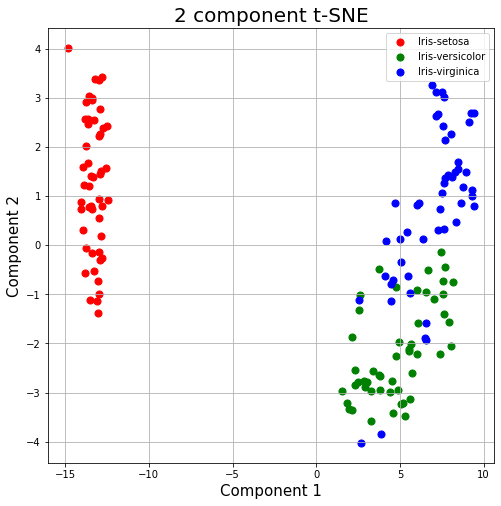

In [46]:
finalDf = pd.concat([principalDf, target], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_title('2 component t-SNE', fontsize = 20)
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'component_1']
               , finalDf.loc[indicesToKeep, 'component_2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Видно, что t-SNE лучше разделяет группы между собой, однако внутри групп объекты более смешанные.
  
Далее рассмотрю на других данных как можно использовать PCA в целях ускорения Machine Learning.  
Для начала скачаем данные MNIST, стандартизируем их, а затем используем PCA с дисперсией 0.95

In [47]:
mnist = fetch_openml('mnist_784')
train_img, test_img, train_lbl, test_lbl = train_test_split(mnist.data, mnist.target, test_size=1/7.0, random_state=0)


Сначала стандартизируем датасет и сделаем предсказание для несжатых данных и посчитаем точность и скорость работы алгоритма.

In [48]:
def model(train_img, train_lbl, test_img, test_lbl):
    logisticRegr = LogisticRegression(solver = 'lbfgs')
    logisticRegr.fit(train_img, train_lbl)
    logisticRegr.predict(test_img[0].reshape(1,-1))
    logisticRegr.predict(test_img[0:10])
    logisticRegr.score(test_img, test_lbl)
    
scaler = StandardScaler()
scaler.fit(train_img)

train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

In [49]:
start_time = time.time()

model(train_img, train_lbl, test_img, test_lbl)

print("Время выполнения: %s секунд" % (time.time() - start_time))

Время выполнения: 27.620182275772095 секунд


C:\Users\Evik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Теперь посмотрим на время выполнения этого же кода после сжатия данных с PCA с дисперсией 0.95

In [25]:
pca = PCA(.95)
pca.fit(train_img)
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

start_time = time.time()

model(train_img, train_lbl, test_img, test_lbl)

print("Время выполнения: %s секунд" % (time.time() - start_time))

Время выполнения: 13.499571084976196 секунд


C:\Users\Evik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
